Data Preprocessing - Diabetes Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,IsolationForest
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,mean_squared_error

--------------------Data preprocessing----------------------------------


In [ ]:
df=pd.read_csv("/content/diabetes_combined_new.csv")
df.head()

,d_patient_id,d_name,m_age,d_gender,d_postoffice_name,d_pincode,d_districts_name,d_state_name,m_HbA1c_level,m_blood_glucose_level,m_bmi,d_hypertension,d_heart_disease,d_smoking_history,d_diabetes,d_risk_factor
0,1,shivani,80.0,female,abdullapuram,632010,vellore,tamilnadu,6.6,140,25.19,0,1,never,0,8
1,36,sunita,5.0,male,abiramam,623601,sivaganga,tamilnadu,5.8,85,15.10,0,0,no info,0,4
2,50,pooja,3.0,female,abiramapuram,600018,chennai,tamilnadu,6.5,100,19.27,0,0,no info,0,7
3,92,fooljhnah,44.0,female,abiviethiswaram,613706,thanjavur,tamilnadu,5.7,145,37.35,0,0,never,0,5
4,97,pooja,67.0,female,achalpuram,609101,cuddalore,tamilnadu,6.2,159,27.32,0,0,never,1,5


In [ ]:
df.shape

(100000, 16)

In [ ]:
num_col=df.columns[df.dtypes!=object]
cat_col=df.columns[df.dtypes==object]
cat_col

Index(['d_name', 'd_gender', 'd_postoffice_name', 'd_districts_name',
       'd_state_name', 'd_smoking_history'],
      dtype='object')

In [ ]:
for i in num_col:
  if i!="gender" and i!="smoking_history":
    print(f"{i}:")
    print(f"Datatype={df[i].dtype}")
    print(f"mean={df[i].mean()}")
    print(f"range={df[i].min()}-{df[i].max()}")

    print("\n")

d_patient_id:
Datatype=int64
mean=50000.5
range=1-100000


m_age:
Datatype=float64
mean=41.8860144
range=0.08-80.0


d_pincode:
Datatype=int64
mean=622839.75181
range=600001-666213


m_HbA1c_level:
Datatype=float64
mean=5.527507
range=3.5-9.0


m_blood_glucose_level:
Datatype=int64
mean=138.05806
range=80-300


m_bmi:
Datatype=float64
mean=27.3207671
range=10.01-95.69


d_hypertension:
Datatype=int64
mean=0.07485
range=0-1


d_heart_disease:
Datatype=int64
mean=0.03942
range=0-1


d_diabetes:
Datatype=int64
mean=0.085
range=0-1


d_risk_factor:
Datatype=int64
mean=4.16057
range=1-9




In [ ]:
df.dtypes

d_patient_id               int64
d_name                    object
m_age                    float64
d_gender                  object
d_postoffice_name         object
d_pincode                  int64
d_districts_name          object
d_state_name              object
m_HbA1c_level            float64
m_blood_glucose_level      int64
m_bmi                    float64
d_hypertension             int64
d_heart_disease            int64
d_smoking_history         object
d_diabetes                 int64
d_risk_factor              int64
dtype: object

In [ ]:
df.isnull().sum()

d_patient_id             0
d_name                   0
m_age                    0
d_gender                 0
d_postoffice_name        0
d_pincode                0
d_districts_name         0
d_state_name             0
m_HbA1c_level            0
m_blood_glucose_level    0
m_bmi                    0
d_hypertension           0
d_heart_disease          0
d_smoking_history        0
d_diabetes               0
d_risk_factor            0
dtype: int64

In [ ]:
df[df.duplicated()].shape

(0, 16)

In [ ]:
df.drop_duplicates(inplace=True)  #remove duplicates
df.fillna(method="ffill",inplace=True)

In [ ]:
df.shape

(100000, 16)

In [ ]:
maxi=max(df["d_diabetes"].value_counts().values)
mini=min(df["d_diabetes"].value_counts().values)

In [ ]:
df1=df[df["d_diabetes"]==0]
df2=df[df["d_diabetes"]==1]
print(F"Diabetes-0={df1.shape}")
print(F"Diabetes-1={df2.shape}")

Diabetes-0=(91500, 16)
Diabetes-1=(8500, 16)


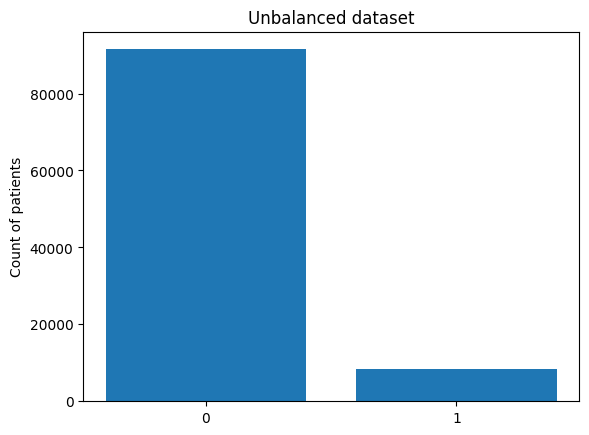

In [ ]:
plt.bar(["0","1"],[df1.shape[0],df2.shape[0]])
plt.ylabel("Count of patients")
plt.title("Unbalanced dataset")
plt.show()

In [ ]:
df1_new=resample(df1,random_state=42,replace=True,n_samples=mini)

In [ ]:
df2.shape

(8500, 16)

In [ ]:
df1_new.shape

(8500, 16)

In [ ]:
df=pd.concat([df1_new,df2])
df.shape

(17000, 16)

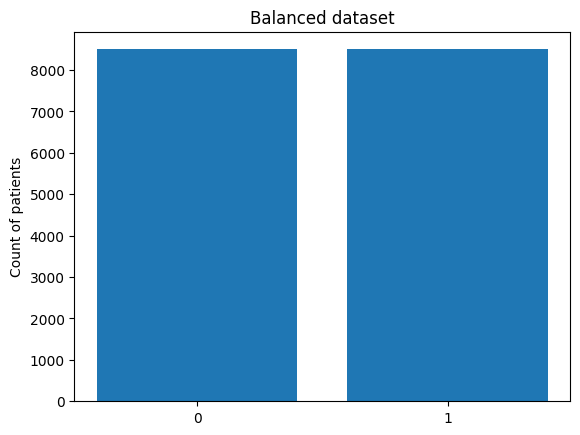

In [ ]:
plt.bar(["0","1"],[df1_new.shape[0],df2.shape[0]])
plt.ylabel("Count of patients")
plt.title("Balanced dataset")
plt.show()

In [ ]:
num_col=df.columns[df.dtypes!=object]
cat_col=df.columns[df.dtypes==object]
print(cat_col)
print(num_col)

Index(['d_name', 'd_gender', 'd_postoffice_name', 'd_districts_name',
       'd_state_name', 'd_smoking_history'],
      dtype='object')
Index(['d_patient_id', 'm_age', 'd_pincode', 'm_HbA1c_level',
       'm_blood_glucose_level', 'm_bmi', 'd_hypertension', 'd_heart_disease',
       'd_diabetes', 'd_risk_factor'],
      dtype='object')


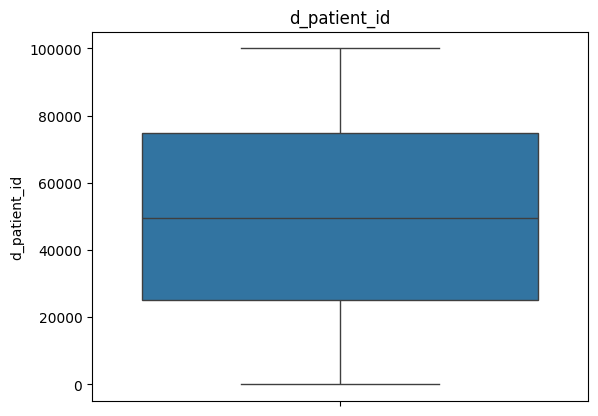

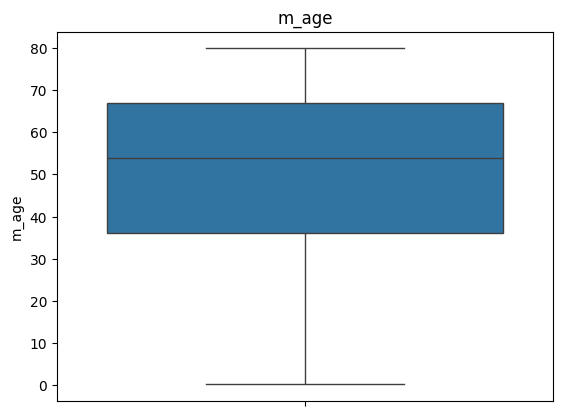

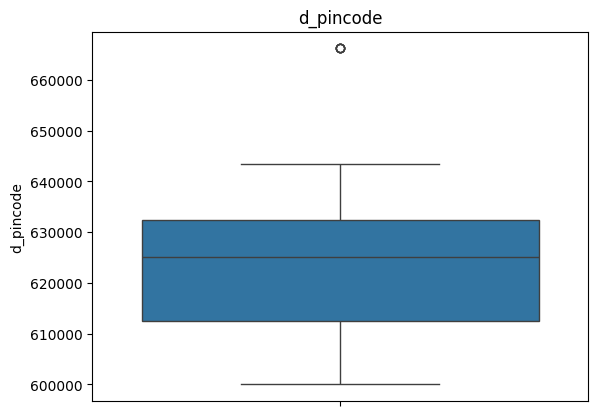

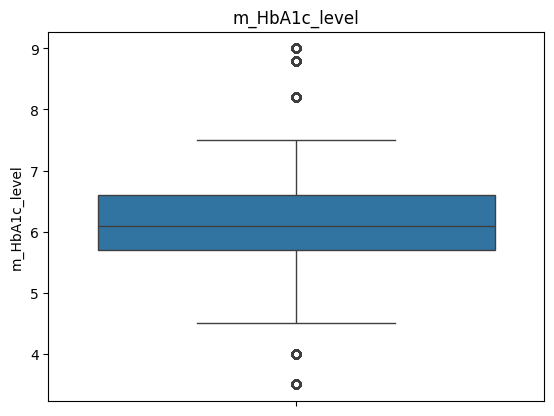

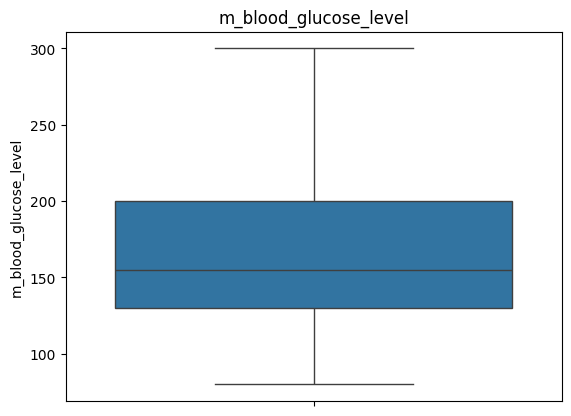

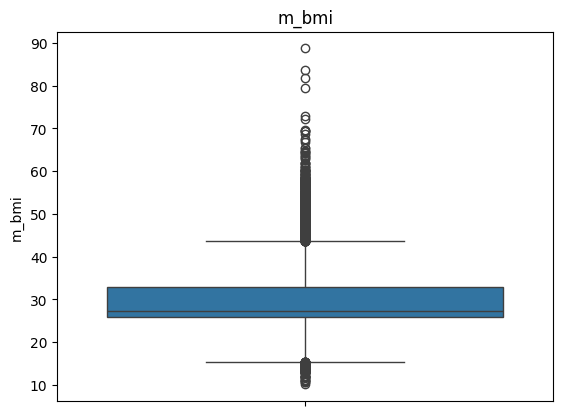

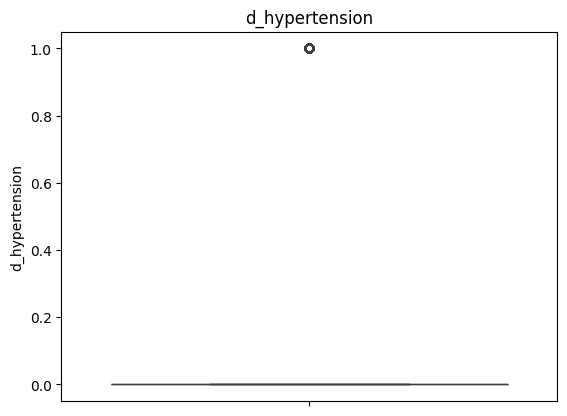

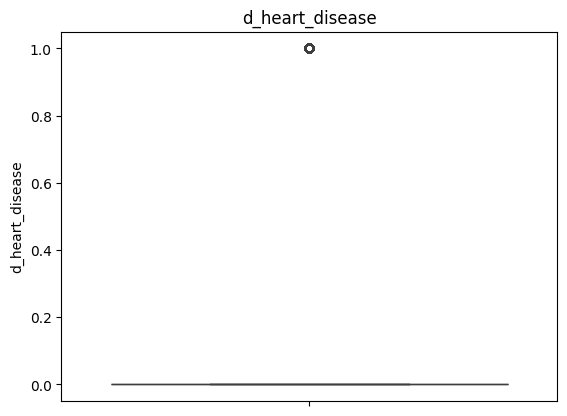

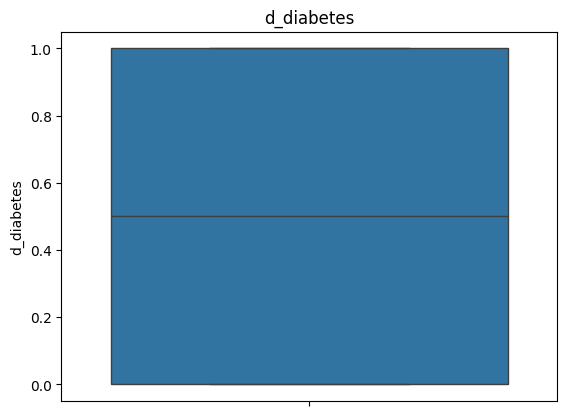

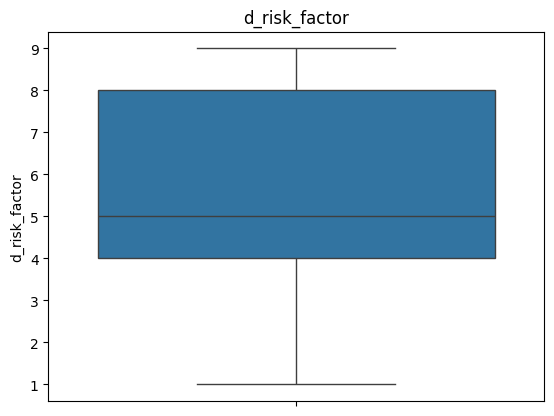

In [ ]:
for i in num_col:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [ ]:
def remove_outliers(df,i):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)

    iqr=q3-q1
    med=df[i].median()
    df=np.where((df[i]<q1-(1.5*iqr)) | (df[i]>q3+(1.5*iqr)),med,df[i])
    return df

In [ ]:
lst=['m_bmi', 'm_HbA1c_level']
for i in lst:
  df[i]=remove_outliers(df,i)

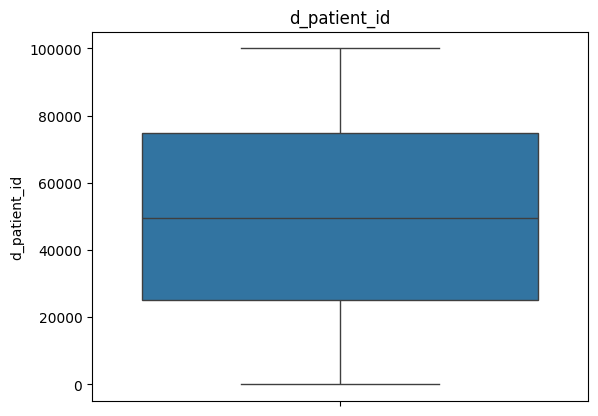

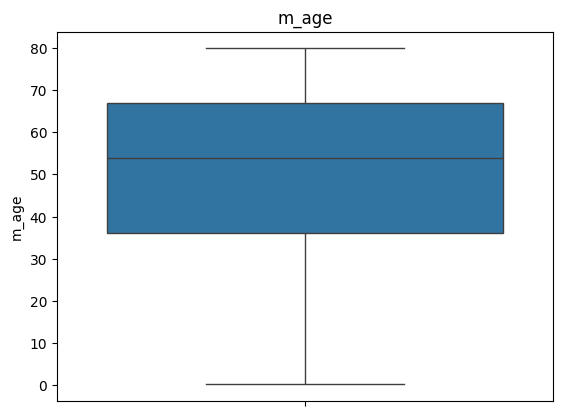

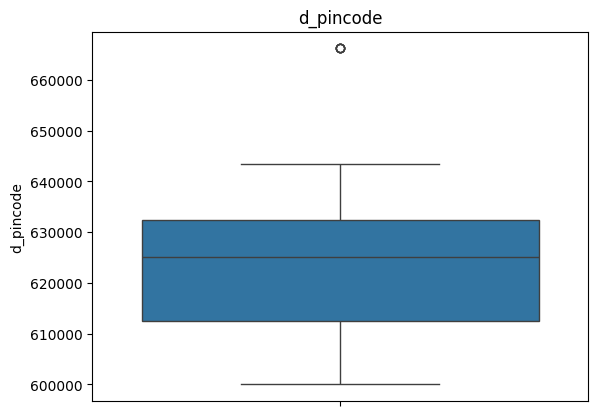

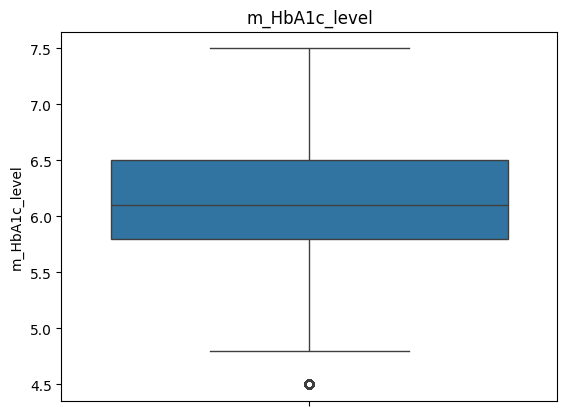

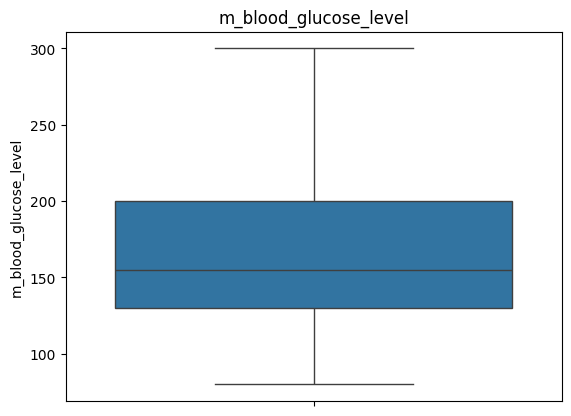

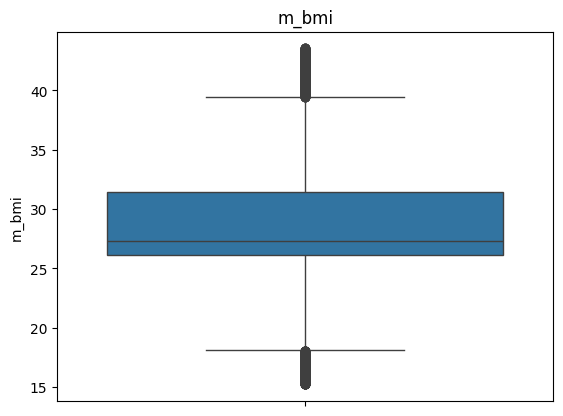

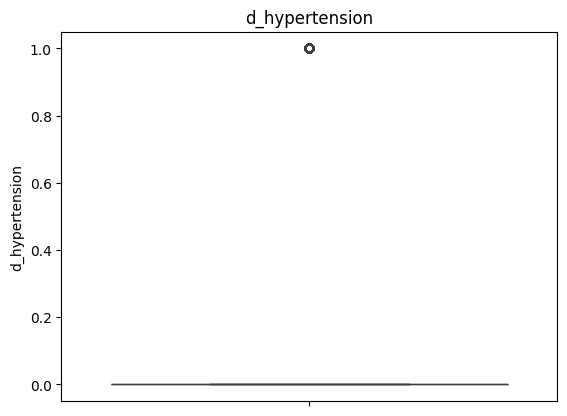

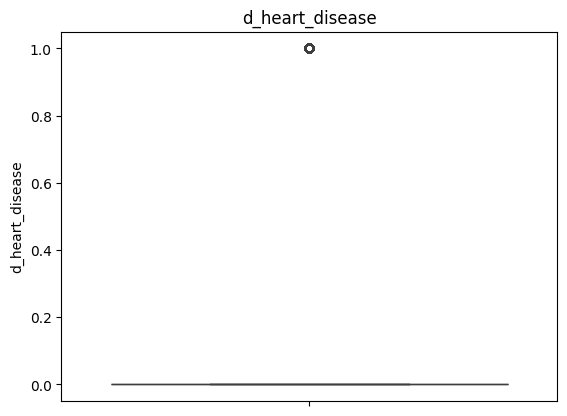

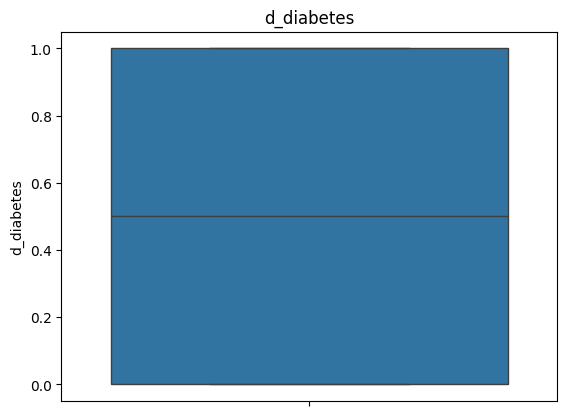

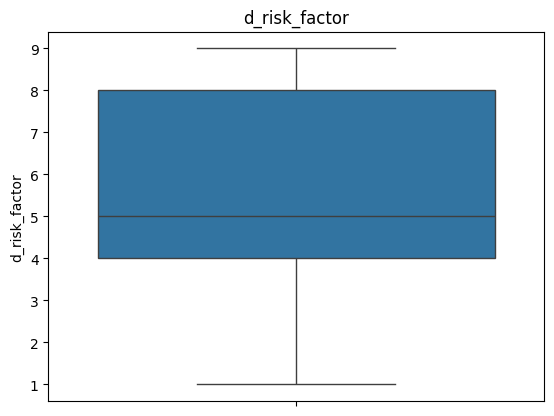

In [ ]:
for i in num_col:    #After removing Outliers
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [ ]:
df.columns

Index(['d_patient_id', 'd_name', 'm_age', 'd_gender', 'd_postoffice_name',
       'd_pincode', 'd_districts_name', 'd_state_name', 'm_HbA1c_level',
       'm_blood_glucose_level', 'm_bmi', 'd_hypertension', 'd_heart_disease',
       'd_smoking_history', 'd_diabetes', 'd_risk_factor'],
      dtype='object')

In [ ]:
df["d_gender"]=preprocessing.LabelEncoder().fit_transform(df["d_gender"])
df["d_smoking_history"]=preprocessing.LabelEncoder().fit_transform(df["d_smoking_history"])

In [ ]:
df.head()

,d_patient_id,d_name,m_age,d_gender,d_postoffice_name,d_pincode,d_districts_name,d_state_name,m_HbA1c_level,m_blood_glucose_level,m_bmi,d_hypertension,d_heart_disease,d_smoking_history,d_diabetes,d_risk_factor
17278,24294,ajay kumar,6.0,2,pamani,614014,thanjavur,tamilnadu,4.8,90,18.96,0,0,4,0,1
942,35064,sonali,36.0,2,kallakurichi h o,606202,vellore,tamilnadu,5.8,90,27.32,0,0,4,0,4
83936,14551,rani,68.0,1,gandhi nagar east,632006,vellore,tamilnadu,6.1,130,28.29,0,0,2,0,1
59991,64623,manisha,11.0,1,tirumangalakudi,612102,thanjavur,tamilnadu,6.1,100,26.26,0,0,3,0,1
6849,50237,ajay kumar,24.0,1,thanjavur bazar,613001,thanjavur,tamilnadu,5.8,200,27.32,0,0,3,0,6


In [ ]:
df.columns

Index(['d_patient_id', 'd_name', 'm_age', 'd_gender', 'd_postoffice_name',
       'd_pincode', 'd_districts_name', 'd_state_name', 'm_HbA1c_level',
       'm_blood_glucose_level', 'm_bmi', 'd_hypertension', 'd_heart_disease',
       'd_smoking_history', 'd_diabetes', 'd_risk_factor'],
      dtype='object')

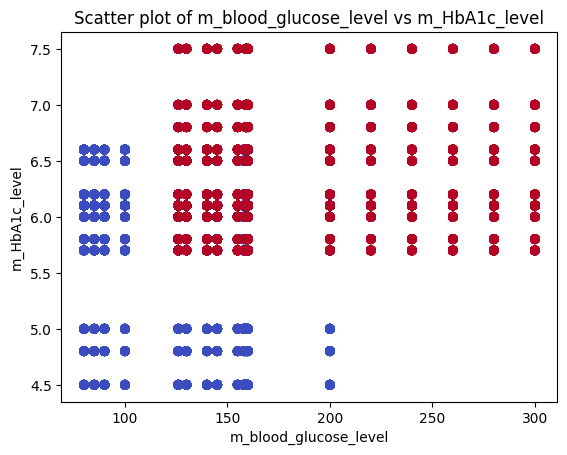

In [ ]:
plt.scatter(df['m_blood_glucose_level'], df['m_HbA1c_level'], c=df['d_diabetes'], cmap='coolwarm')

plt.xlabel('m_blood_glucose_level')
plt.ylabel('m_HbA1c_level')
plt.title('Scatter plot of m_blood_glucose_level vs m_HbA1c_level')

plt.show()

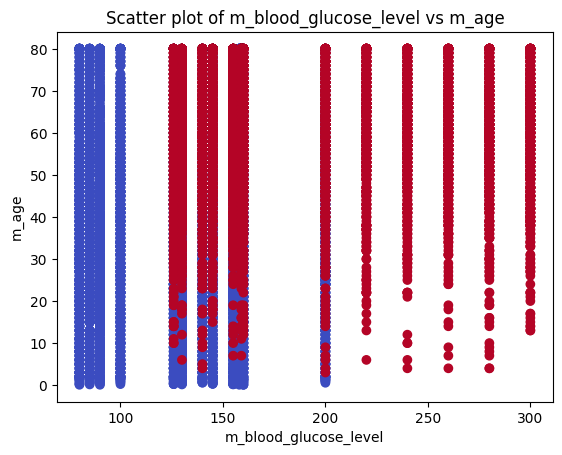

In [ ]:
plt.scatter(df['m_blood_glucose_level'], df['m_age'], c=df['d_diabetes'], cmap='coolwarm')

plt.xlabel('m_blood_glucose_level')
plt.ylabel('m_age')
plt.title('Scatter plot of m_blood_glucose_level vs m_age')

plt.show()

<ipython-input-24-ba95cbed069a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x=df.corr().d_diabetes.sort_values(ascending=False)[1:]


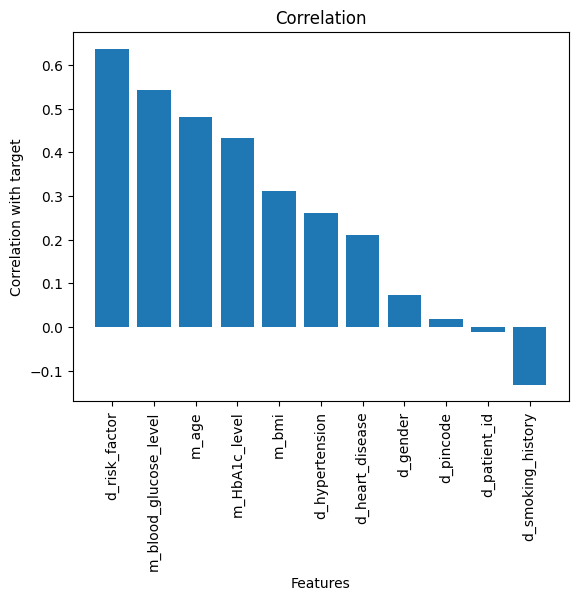

                       d_diabetes
d_risk_factor            0.637255
m_blood_glucose_level    0.541820
m_age                    0.479702
m_HbA1c_level            0.431784
m_bmi                    0.312273
d_hypertension           0.261251
d_heart_disease          0.210922
d_gender                 0.073221
d_pincode                0.017448
d_patient_id            -0.011034
d_smoking_history       -0.131832


In [ ]:
x=df.corr().d_diabetes.sort_values(ascending=False)[1:]
temp=pd.DataFrame(x)
temp
plt.bar(temp.index,temp["d_diabetes"])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Correlation with target")
plt.title("Correlation")
plt.show()
print(temp)

In [ ]:
num_col=df.columns[df.dtypes!=object]
cat_col=df.columns[df.dtypes==object]
cat_col

Index(['d_name', 'd_postoffice_name', 'd_districts_name', 'd_state_name'], dtype='object')

In [ ]:
df.drop(columns=["d_patient_id","d_gender","d_pincode"],inplace=True)

In [ ]:
df.drop(columns=cat_col,inplace=True)
df.head()

,m_age,m_HbA1c_level,m_blood_glucose_level,m_bmi,d_hypertension,d_heart_disease,d_smoking_history,d_diabetes,d_risk_factor
17278,6.0,4.8,90,18.96,0,0,4,0,1
942,36.0,5.8,90,27.32,0,0,4,0,4
83936,68.0,6.1,130,28.29,0,0,2,0,1
59991,11.0,6.1,100,26.26,0,0,3,0,1
6849,24.0,5.8,200,27.32,0,0,3,0,6


<Axes: >

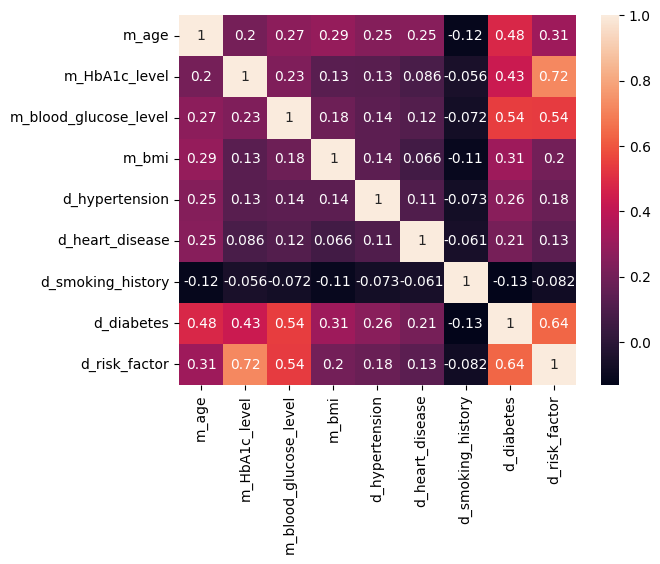

In [ ]:
sns.heatmap(df.corr(),annot=True)

Predictive Analysis

In [ ]:
def test_train(df,features,targets):
  x_train,x_test,y_train,y_test=train_test_split(features,targets,test_size=0.3,random_state=42)
  return(x_train,x_test,y_train,y_test)

In [ ]:
features=df.drop(columns=["d_diabetes","d_smoking_history"])
target=df["d_diabetes"]
x_train,x_test,y_train,y_test=test_train(df,features,target)

In [ ]:
x=StandardScaler()

X_train=x.fit_transform(x_train)
X_test=x.transform(x_test)

In [ ]:
X_train

array([[ 0.3812987 , -0.41287652,  1.35341394, ..., -0.42119093,
        -0.31367809,  0.1962027 ],
       [ 0.61390346,  0.0611905 ,  1.00122367, ..., -0.42119093,
        -0.31367809,  1.36770906],
       [-1.38649748, -2.46716694, -0.40753742, ..., -0.42119093,
        -0.31367809, -1.36580577],
       ...,
       [-2.27039557,  0.8513022 , -1.37606066, ..., -0.42119093,
        -0.31367809,  0.58670482],
       [-1.47953938,  0.69327986, -0.31948985, ..., -0.42119093,
        -0.31367809,  0.97720694],
       [ 0.33477775,  0.0611905 ,  1.70560421, ...,  2.37422016,
        -0.31367809,  0.1962027 ]])

In [ ]:
alpha=0.01
lasso_model=Lasso(alpha=alpha)
lasso_model.fit(X_train,y_train)
y_pred=lasso_model.predict(X_test)

print(f"mse={mean_squared_error(y_test,y_pred)}")
featurezz=np.where(lasso_model.coef_!=0)[0]
coeff=lasso_model.coef_[lasso_model.coef_!=0]
print(featurezz)
print(features.columns)
print(coeff)
print(f"Intercept={lasso_model.intercept_}")

mse=0.11194638420538472
[0 1 2 3 4 5 6]
Index(['m_age', 'm_HbA1c_level', 'm_blood_glucose_level', 'm_bmi',
       'd_hypertension', 'd_heart_disease', 'd_risk_factor'],
      dtype='object')
[0.11247907 0.00728974 0.11141026 0.04787144 0.0307686  0.01880673
 0.19231793]
Intercept=0.5015126050420168


In [ ]:
clf = SVC(kernel="rbf",gamma=0.5,C=1)
clf.fit(X_train, y_train)
res=clf.predict(X_test)

Accuracy score=0.8984313725490196
Recall score=0.8802870090634441
precision score=0.9206161137440758
f1 score=0.9
Confusion Matrix=


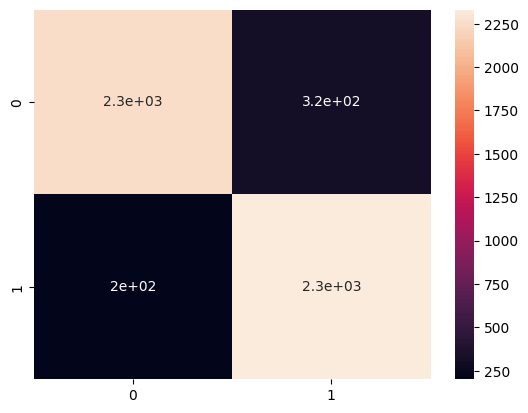

In [ ]:
print(f"Accuracy score={accuracy_score(res,y_test)}")
print(f"Recall score={recall_score(res,y_test)}")
print(f"precision score={precision_score(res,y_test)}")
print(f"f1 score={f1_score(res,y_test)}")
print(f"Confusion Matrix=")
conf_matrix=confusion_matrix(y_test,res)
sns.heatmap(conf_matrix,annot=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
Accuracy score=0.8472549019607843
Recall score=0.8463058079810352
precision score=0.8459715639810427
f1 score=0.846138652972546
Confusion Matrix=


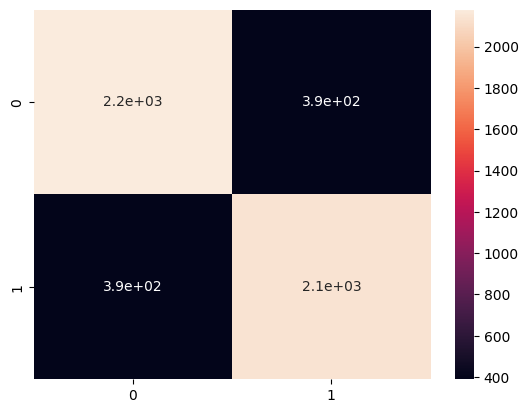

RandomForestClassifier()
Accuracy score=0.8909803921568628
Recall score=0.8811728395061729
precision score=0.9020537124802528
f1 score=0.8914910226385636
Confusion Matrix=


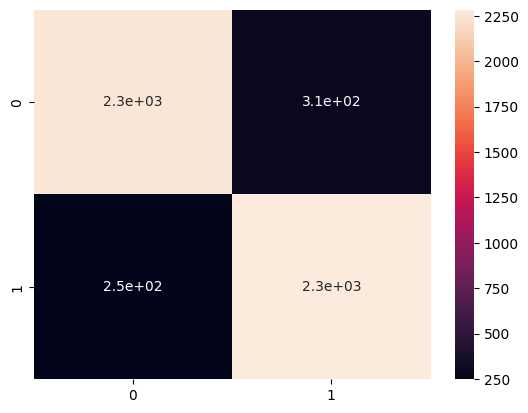

DecisionTreeClassifier()
Accuracy score=0.8719607843137255
Recall score=0.8762515018021626
precision score=0.8641390205371248
f1 score=0.870153111950686
Confusion Matrix=


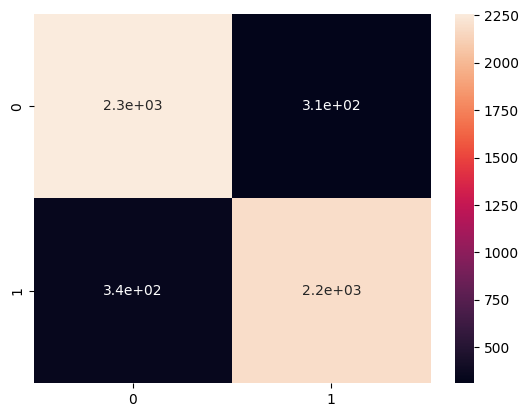

KNeighborsClassifier()
Accuracy score=0.8664705882352941
Recall score=0.8467590857999251
precision score=0.8925750394944708
f1 score=0.8690636416073833
Confusion Matrix=


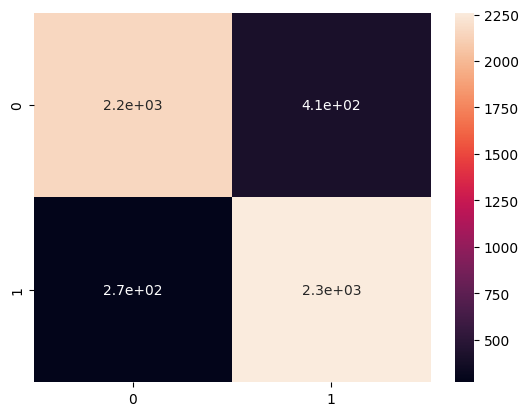

GaussianNB()
Accuracy score=0.8358823529411765
Recall score=0.853566958698373
precision score=0.8080568720379147
f1 score=0.8301886792452831
Confusion Matrix=


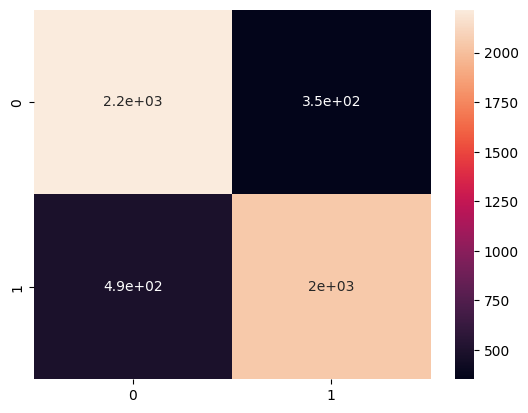

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)
Accuracy score=0.8723529411764706
Recall score=0.8724752475247525
precision score=0.8700631911532386
f1 score=0.871267549930789
Confusion Matrix=


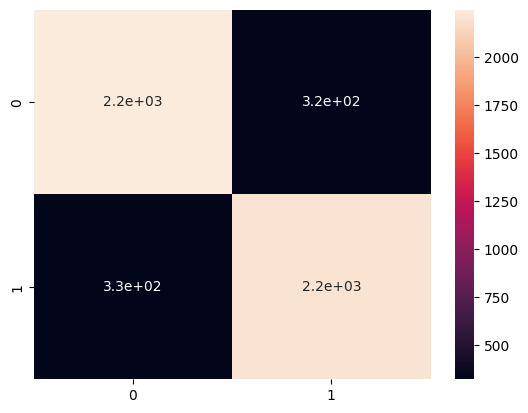

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy score=0.9003921568627451
Recall score=0.8922480620155039
precision score=0.9091627172195893
f1 score=0.9006259780907669
Confusion Matrix=


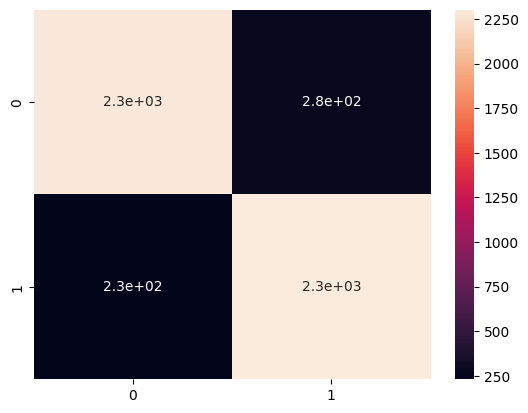

In [ ]:
dec=DecisionTreeClassifier()
models={"Logreg":LogisticRegression(),"Rf":RandomForestClassifier(),"dt":dec,"knn":KNeighborsClassifier(),"Naive Bayes": GaussianNB(),
        "ada":AdaBoostClassifier(base_estimator=dec,n_estimators=50,random_state=42),"xgb":XGBClassifier()}

for mod in models:
  temp=models[mod]
  temp.fit(x_train,y_train)
  res=temp.predict(x_test)
  print(str(temp))
  print(f"Accuracy score={accuracy_score(res,y_test)}")
  print(f"Recall score={recall_score(res,y_test)}")
  print(f"precision score={precision_score(res,y_test)}")
  print(f"f1 score={f1_score(res,y_test)}")
  print(f"Confusion Matrix=")
  conf_matrix=confusion_matrix(y_test,res)
  sns.heatmap(conf_matrix,annot=True)
  plt.show()
  # con_mat=confusion_matrix(res,y_test)
  # sns.heatmap(con_mat,annot=True)
  # plt.show()

2-Kmeansclustering


In [ ]:
df=pd.read_csv("/content/cluster_data.csv")
df=df[["trip_duration","total_fare"]].values
df

array([[ 748.   ,  105.3  ],
       [1187.   ,  142.2  ],
       [ 730.   ,   97.875],
       ...,
       [ 571.   ,   69.75 ],
       [ 491.   ,   69.75 ],
       [3614.   ,  339.75 ]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

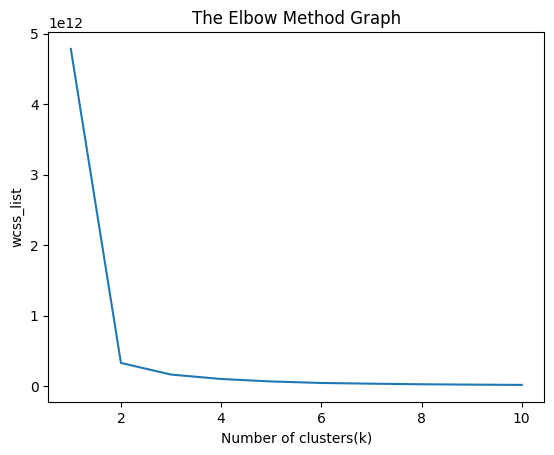

In [ ]:
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(df)

    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(df)
for i in y_predict:
  print(i,end=" ")
print("\n")
print(len(y_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

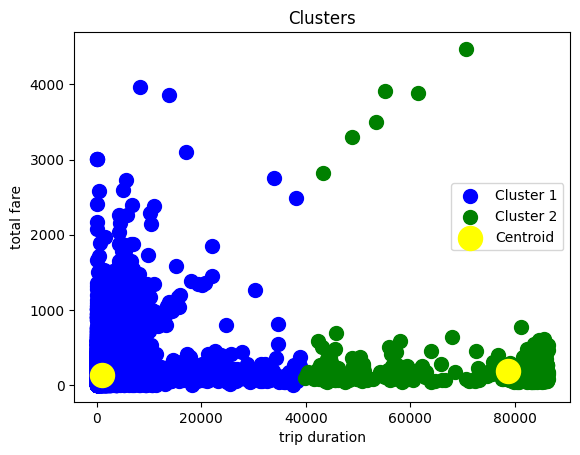

In [ ]:
plt.scatter(df[y_predict == 0, 0], df[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(df[y_predict == 1, 0], df[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters')
plt.xlabel('trip duration')
plt.ylabel('total fare')
plt.legend()
plt.show()

In [ ]:
print("----------------------")

----------------------


THe end
